In [108]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [109]:
#Load data
dataset_raw = pd.read_csv("insurance.csv")
dataset = dataset_raw.copy()
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0, 0.5, 'BMI Values')

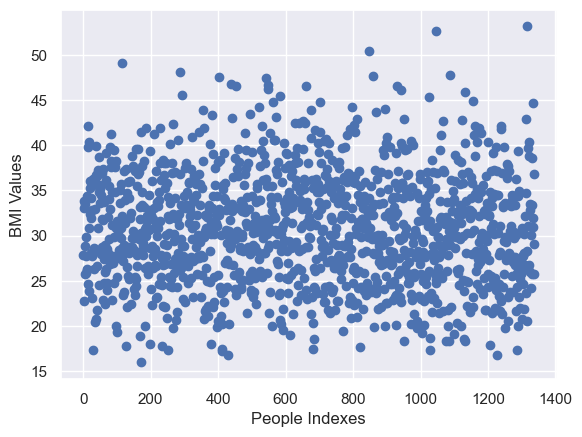

In [110]:
#EDA 
sns.set_theme()
#The distrubiton of BMI
bmi = dataset.iloc[:,2]
dataset_indexes = dataset.index.values.tolist()


plt.scatter(dataset_indexes,bmi)
plt.xlabel("People Indexes") 
plt.ylabel("BMI Values")



C:\Users\BERKE\AppData\Local\Temp\ipykernel_33360\3083828820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bmi)


<Axes: xlabel='bmi', ylabel='Density'>

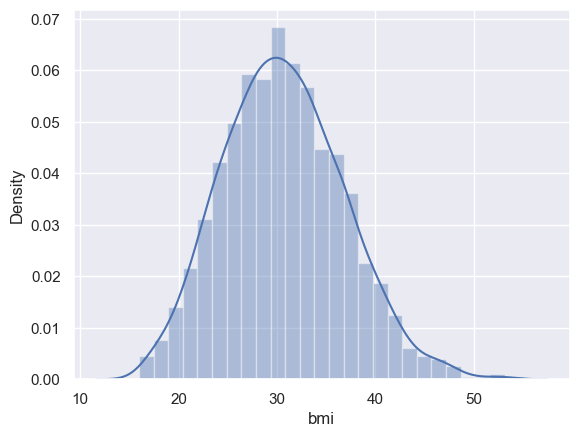

In [111]:
#for any kind of distribution the distplot of seaborn should be fine
sns.distplot(bmi)

<BarContainer object of 1338 artists>

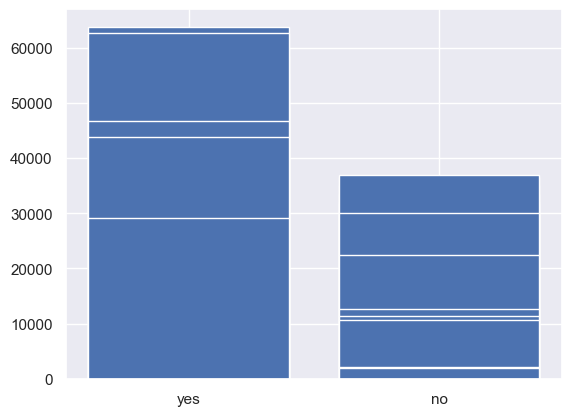

In [112]:
#Relationship between smokers and charges
smokers = dataset.iloc[:,4]
charges = dataset.iloc[:,6]

plt.bar(smokers,charges)


<Axes: xlabel='population', ylabel='smoker'>

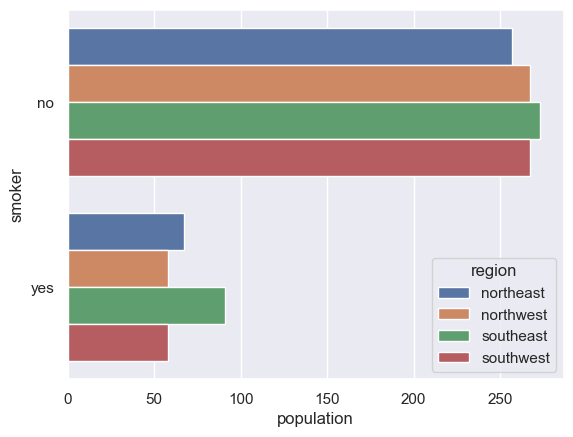

In [113]:
#Relationship between smokers and region
# it is quite har to visualize two categorical datas relationship so to make it a little bit easier the population attribute added

regions_and_population = dataset.groupby(['smoker','region']).size().reset_index()
regions_and_population = regions_and_population.rename(columns={0:"population"})
sns.barplot(data = regions_and_population,x = 'population' , y = "smoker", hue= "region")

<Axes: ylabel='bmi'>

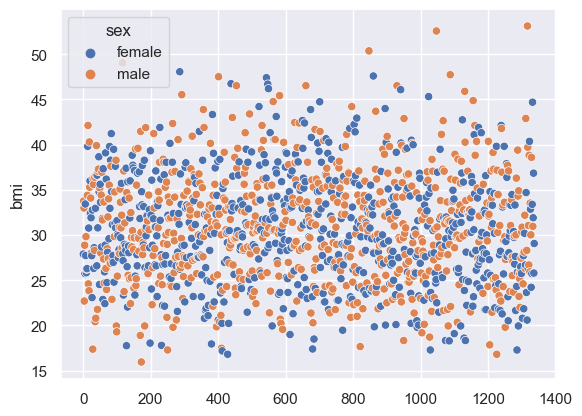

In [114]:
#Relationship between sex and bmi
#the chart is representing us the relationship between bmi and sex over every data in dataset. As you can see sex attribute classified over two color

sex = dataset.iloc[:,1]
sns.scatterplot(data= dataset,x = dataset_indexes, y = 'bmi', hue= 'sex')



,region,children
0,northeast,339
1,northwest,373
2,southeast,382
3,southwest,371


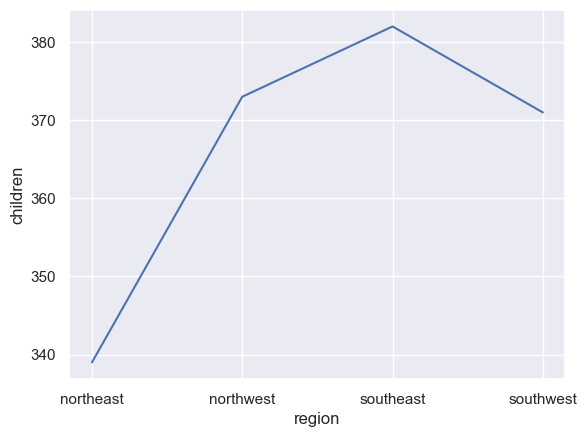

In [115]:
#Finding the region with the most children
region_and_child_population = dataset.groupby(['region'])['children'].sum().reset_index()


sns.lineplot(data = region_and_child_population, x = 'region', y = 'children')
region_and_child_population

#Clearly the southeast region is the region with the most children


c:\Users\BERKE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


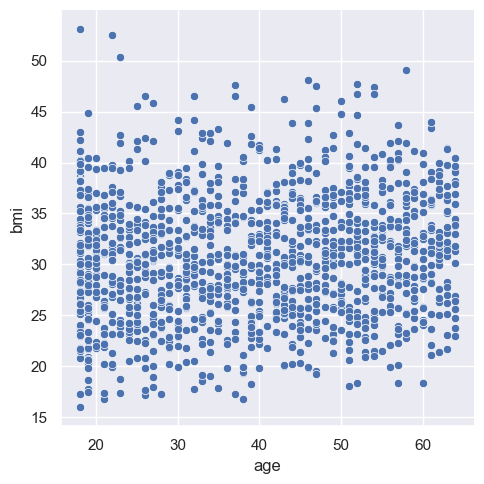

In [116]:
#Realation between age and bmi
age = dataset.iloc[:,0]
sns.relplot(x= age , y = bmi,)
#we can see the bmi distribution on age attribute


<Axes: xlabel='children', ylabel='bmi'>

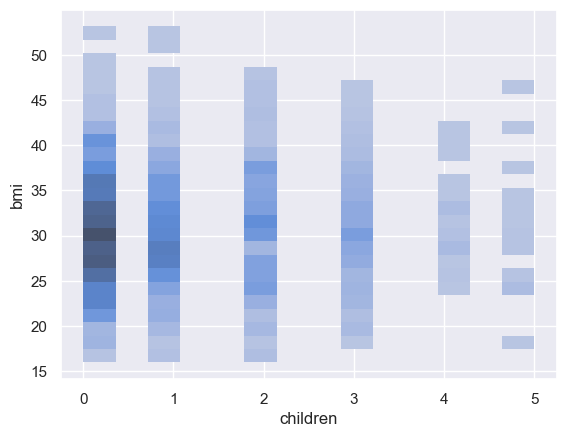

In [117]:
#the relation between children and bmi
children = dataset.iloc[:,3]
sns.histplot(data = dataset, x =children, y = bmi)


<Axes: >

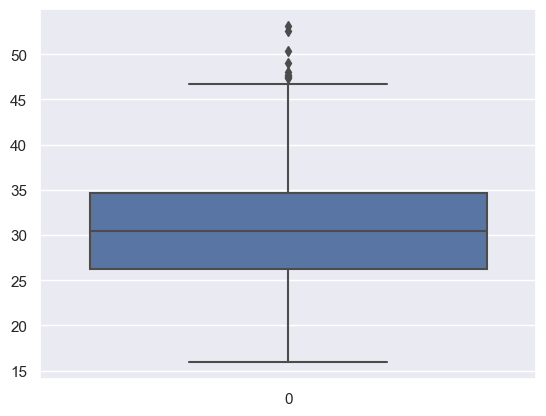

In [118]:
# is there an outlier in the bmi variable ?
# actually yes if we look the first chart, we can see the outliers that is not suitable with other data points
# also we can see the outliers using boxplots

sns.boxplot(bmi)

<Axes: xlabel='bmi', ylabel='charges'>

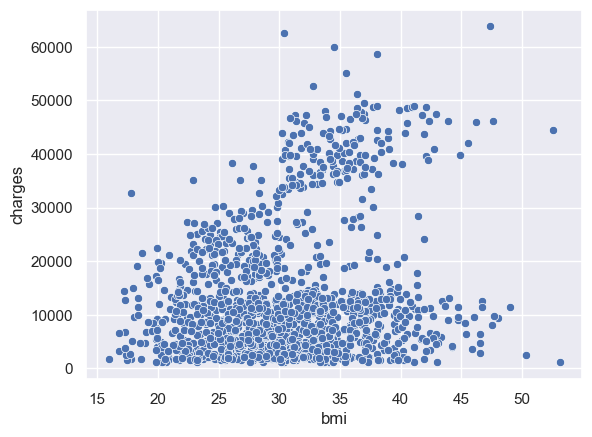

In [119]:
# The relationhip between bmi and charges
# Here we can see the distribution of the bmi over charges

sns.scatterplot(data=dataset,x="bmi", y="charges")

c:\Users\BERKE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


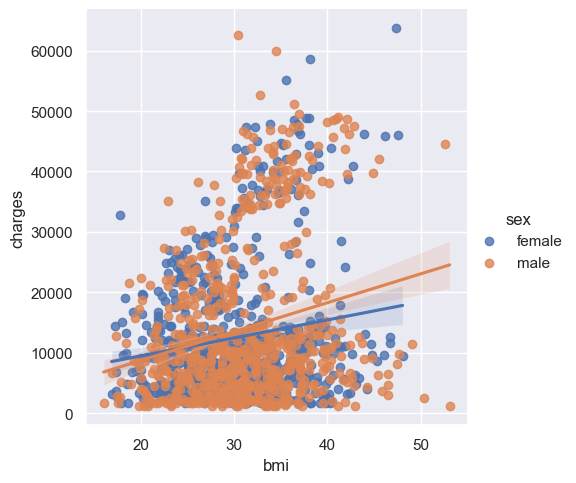

In [120]:
#also we can add this formula the sex and make it easier to assignation
sns.lmplot(data=dataset,x="bmi", y="charges", hue="sex")


c:\Users\BERKE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


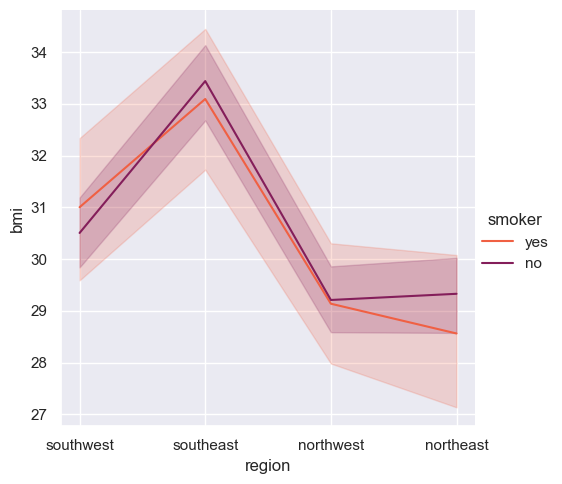

In [121]:
#When examining the relationship between region , smoker and bmi we can use an advanced relplot
sns.relplot(data=dataset, x="region", y="bmi",hue="smoker", kind="line",palette="rocket_r")

In [122]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#Data Preprocessing

labelencoder = LabelEncoder()

dataset.dropna(inplace = True)

dataset["sex"] = labelencoder.fit_transform(dataset["sex"])

dataset["region"] = labelencoder.fit_transform(dataset["region"])

dataset["smoker"] = labelencoder.fit_transform(dataset["smoker"])

scaler = preprocessing.MinMaxScaler()
normalized_dataset = scaler.fit_transform(dataset)
normalized_dataset = pd.DataFrame(normalized_dataset, columns = dataset.columns)

y = normalized_dataset["charges"]
X = normalized_dataset.drop(['charges'], axis=1)
#split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


print(normalized_dataset)


           age  sex       bmi  children  smoker    region   charges
0     0.021739  0.0  0.321227       0.0     1.0  1.000000  0.251611
1     0.000000  1.0  0.479150       0.2     0.0  0.666667  0.009636
2     0.217391  1.0  0.458434       0.6     0.0  0.666667  0.053115
3     0.326087  1.0  0.181464       0.0     0.0  0.333333  0.333010
4     0.304348  1.0  0.347592       0.0     0.0  0.333333  0.043816
...        ...  ...       ...       ...     ...       ...       ...
1333  0.695652  1.0  0.403820       0.6     0.0  0.333333  0.151299
1334  0.000000  0.0  0.429379       0.0     0.0  0.000000  0.017305
1335  0.000000  0.0  0.562012       0.0     0.0  0.666667  0.008108
1336  0.065217  0.0  0.264730       0.0     0.0  1.000000  0.014144
1337  0.934783  0.0  0.352704       0.0     1.0  0.333333  0.447249

[1338 rows x 7 columns]


[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
[0.81076092 0.77619253 0.6995527  0.74935929 0.73395791]
Mean Score = 0.7473
Mean Score = 0.7540


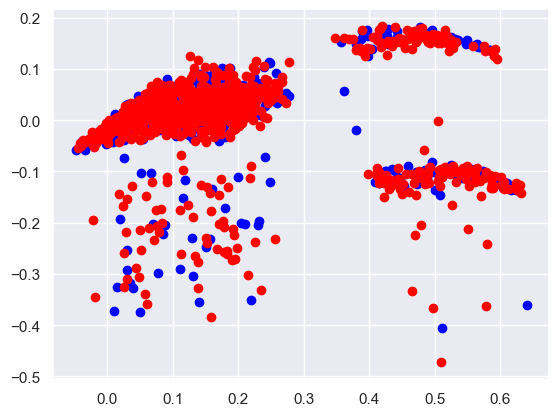

In [132]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error



linear_regression = linear_model.LinearRegression()
polynomal_regression = linear_model.LinearRegression()

degree = 4
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

polynomal_regression.fit(X_train_poly,y_train)
linear_regression.fit(X_train,y_train)

polynomal_prediction = polynomal_regression.predict(X_test_poly)

plt.scatter(linear_regression.predict(X_test),linear_regression.predict(X_test) - y_test,color="blue",label='Test data')
plt.scatter(linear_regression.predict(X_train),linear_regression.predict(X_train) - y_train,color="red",label='Train data')

scores_linear = cross_val_score(linear_regression, X, y)
scores_polynomal = cross_val_score(polynomal_regression, X_train_poly, y_train)
print(scores_linear)
print(scores_polynomal)

mean_score_linear = scores_linear.mean()
print(f"Mean Score = {mean_score_linear:.4f}")

mean_score_polynomal = scores_polynomal.mean()
print(f"Mean Score = {mean_score_polynomal:.4f}")
